# Exercice 02

1. Charger les données dans un DataFrame Pandas et afficher un aperçu général du jeu de données.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_excel('./data/ecommerce_transactions.xlsx')
df.sample(5)

,Transaction ID,Date,Client ID,Pays,Catégorie,Marque,Quantité,Prix unitaire (€),Méthode de paiement,Note client,Montant total (€)
3668,ec574e06-ce7e-4c7e-a568-533e4fa178f3,2024-11-20,7cdf53a0-62f7-4980-8dfd-52f06c0576d5,Martinique,Électronique,series,5,367.41,Cryptomonnaie,2.0,1837.05
4744,79e15346-2de8-409e-896e-9524cccb3964,2024-07-23,1e2192ac-b55c-4f74-8473-f1c2f5a48cf8,Rwanda,Électronique,which,4,249.08,Carte bancaire,3.0,996.32
2523,45503b88-6282-45c9-ab8e-6955632f7547,2024-08-25,66beefbe-25f0-44f5-9215-057c83b4264f,Uzbekistan,Vêtements,trip,4,85.11,Virement,5.0,340.44
4663,68c794aa-c99b-4ac1-af79-30d221c159c8,2024-04-13,ee795774-c191-4d3c-850d-b63c0539b329,Poland,Sport,imagine,3,17.91,Virement,3.0,53.73
7884,5802f02e-c70e-431e-98ac-a044bbc92663,2025-01-09,8af6e3c7-2095-403c-93dc-8518eec6affa,Congo,Livres,when,2,26.62,Virement,NaN,53.24


2. Afficher les dimensions du DataFrame et le type de chaque colonne.

In [56]:
df.shape, df.dtypes

((10000, 11),
 Transaction ID                 object
 Date                   datetime64[ns]
 Client ID                      object
 Pays                           object
 Catégorie                      object
 Marque                         object
 Quantité                        int64
 Prix unitaire (€)             float64
 Méthode de paiement            object
 Note client                   float64
 Montant total (€)             float64
 dtype: object)

3. Identifier les colonnes contenant des valeurs manquantes et proposer une stratégie adaptée pour les traiter (ex : selon la catégorie ou la méthode de paiement).

In [57]:
df.isnull().sum()

Transaction ID           0
Date                     0
Client ID                0
Pays                     0
Catégorie                0
Marque                   0
Quantité                 0
Prix unitaire (€)        0
Méthode de paiement      0
Note client            486
Montant total (€)        0
dtype: int64

In [58]:
mean_by_payment_method = df.groupby('Méthode de paiement')['Note client'].transform('mean')
df['Note client'] = df['Note client'].fillna(mean_by_payment_method)
df['Note client'].isnull().sum()

0

4. Supprimer les doublons éventuels.

In [59]:
df.drop_duplicates(inplace=True)

5. Créer une colonne ‘Année-Mois’ à partir de la colonne ‘Date’ pour faciliter l’analyse temporelle.

In [60]:
df["Année-Mois"] = pd.to_datetime(df["Date"]).dt.to_period("M")

6. Afficher les cinq (05) pays générant le plus de chiffre d’affaires total.

In [61]:
df.groupby('Pays')['Montant total (€)'].sum().nlargest(5)

Pays
Congo                               62651.57
Korea                               56505.16
Bouvet Island (Bouvetoya)           51194.43
Saint Vincent and the Grenadines    47342.95
Guinea                              45917.90
Name: Montant total (€), dtype: float64

7. Calculer le chiffre d’affaires total par catégorie de produits.

In [62]:
df.groupby('Catégorie')['Montant total (€)'].sum()

Catégorie
Beauté          1088611.50
Jouets          1077596.12
Livres          1095512.08
Maison          1129628.11
Sport           1085520.34
Vêtements       1039763.06
Électronique    1089970.04
Name: Montant total (€), dtype: float64

8. Identifier les marques les plus vendus (en quantité) dans chaque catégorie.

In [63]:
df.groupby('Catégorie')['Marque'].value_counts().groupby(level=0).head(1)

Catégorie     Marque  
Beauté        station     8
Jouets        author      6
Livres        former      6
Maison        boy         6
Sport         add         8
Vêtements     cut         6
Électronique  interest    7
Name: count, dtype: int64

9. Afficher les méthodes de paiement les plus utilisées par pays.

In [64]:
df.groupby('Pays')['Méthode de paiement'].value_counts().groupby(level=0).head(1)

Pays               Méthode de paiement
Afghanistan        PayPal                 14
Albania            PayPal                 15
Algeria            Carte bancaire         10
American Samoa     Carte bancaire         17
Andorra            Virement               10
                                          ..
Wallis and Futuna  Virement               15
Western Sahara     PayPal                 14
Yemen              Cryptomonnaie          18
Zambia             PayPal                 13
Zimbabwe           Virement               15
Name: count, Length: 243, dtype: int64

10. Déterminer la dépense moyenne par client et afficher les 10 plus gros clients.

In [65]:
df.groupby('Client ID')['Montant total (€)'].mean().nlargest(10)

Client ID
54dd8f81-9694-4b08-9ec3-b9b1ce7c71dd    2499.30
57ac7dde-87ab-4bc6-b1c9-8ef1f50043f2    2499.15
ac37e848-e0b4-4b99-bd1d-545d3ae6e2a4    2498.85
2d0f2807-6e64-47d6-89ca-c453497be584    2498.75
6125eb8b-7eec-4a21-852a-5251693005a5    2498.50
3e70243c-dc08-456c-a73f-81d1c6e2a508    2497.30
f442ea40-3616-496c-abce-d55afda46d7d    2495.95
cf00aa12-decc-41fa-baa5-4f28c45a95a5    2494.70
56aeeaa9-bbaa-400e-b685-20292ed23167    2492.65
6408b7f1-59a8-4d7c-811d-6fa2b800ff5c    2492.20
Name: Montant total (€), dtype: float64

11. Calculer la note moyenne par catégorie de marque et par pays.

In [66]:
df.groupby(['Catégorie', 'Pays'])['Note client'].mean()

Catégorie     Pays             
Beauté        Afghanistan          3.000000
              Albania              2.333333
              Algeria              4.000000
              American Samoa       3.000000
              Andorra              3.000000
                                     ...   
Électronique  Wallis and Futuna    3.317865
              Western Sahara       3.800000
              Yemen                3.699397
              Zambia               4.333333
              Zimbabwe             3.441557
Name: Note client, Length: 1695, dtype: float64

12. Identifier les commandes avec une note manquante et déterminer s’il existe un schéma selon la catégorie ou le pays.

In [78]:
df[df['Note client'].isnull()][['Catégorie', 'Pays']].value_counts()

Series([], Name: count, dtype: int64)

13. Utiliser NumPy pour calculer la moyenne, la médiane, l’écart-type et les percentiles des montants totaux.

In [68]:
print(f"Moyenne: {np.mean(df['Montant total (€)'])}")
print(f"Médiane: {np.median(df['Montant total (€)'])}")
print(f"Ecart-type: {np.std(df['Montant total (€)'])}")
print(f"Percentiles: {np.percentile(df['Montant total (€)'], [25, 50, 75])}")

Moyenne: 760.660125
Médiane: 605.4749999999999
Ecart-type: 595.9200987235248
Percentiles: [ 280.995  605.475 1142.76 ]


14. Créer une colonne ‘Client fidèle’ : True si le client a effectué plus de cinq (05) commandes.

In [69]:
df['Client fidèle'] = df.groupby('Client ID')['Client ID'].transform('count') > 5
df['Client fidèle'].value_counts()

Client fidèle
False    10000
Name: count, dtype: int64

15. Créer un graphique à barres montrant le chiffre d’affaires mensuel total.

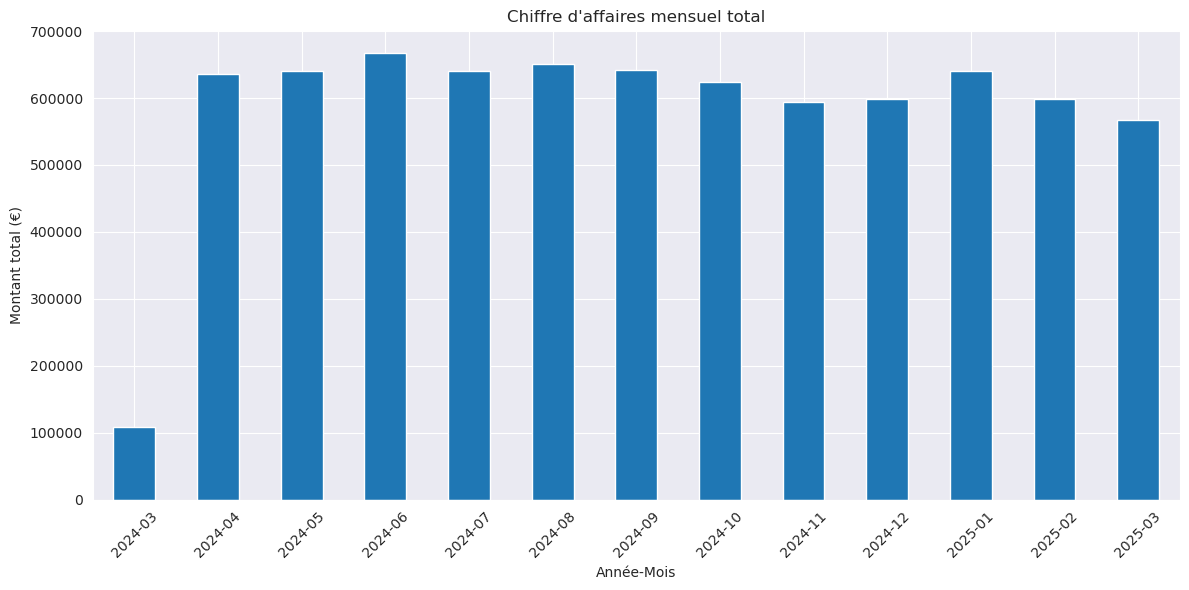

In [70]:
monthly_revenue = df.groupby('Année-Mois')['Montant total (€)'].sum()
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='bar')
plt.title('Chiffre d\'affaires mensuel total')
plt.xlabel('Année-Mois')
plt.ylabel('Montant total (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

16. Créer un pie chart montrant la répartition des ventes par catégorie.

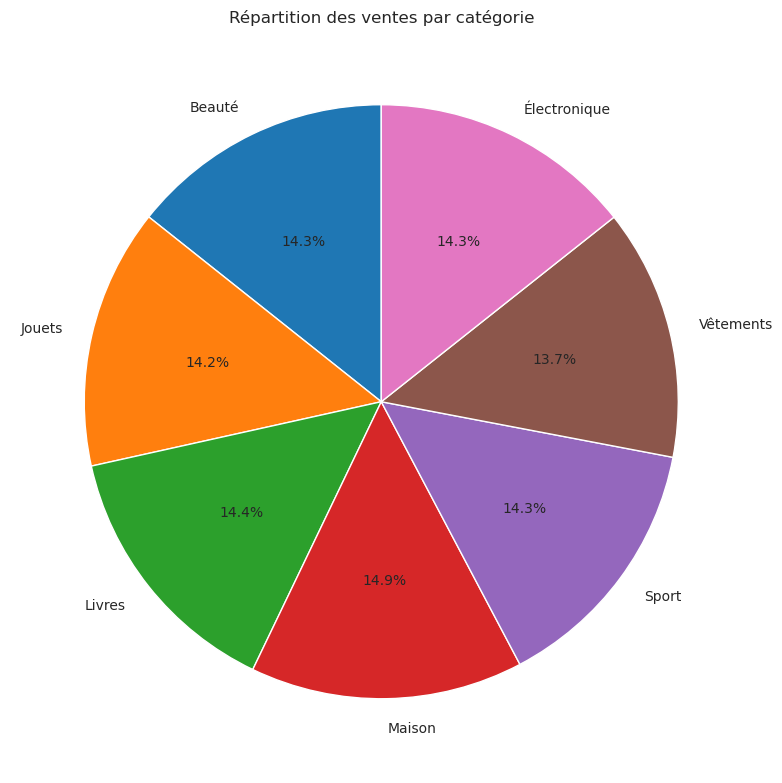

In [71]:
category_sales = df.groupby('Catégorie')['Montant total (€)'].sum()
plt.figure(figsize=(8, 8))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Répartition des ventes par catégorie')
plt.ylabel('')
plt.tight_layout()
plt.show()

17. Créer un boxplot comparant le montant des commandes par méthode de paiement.

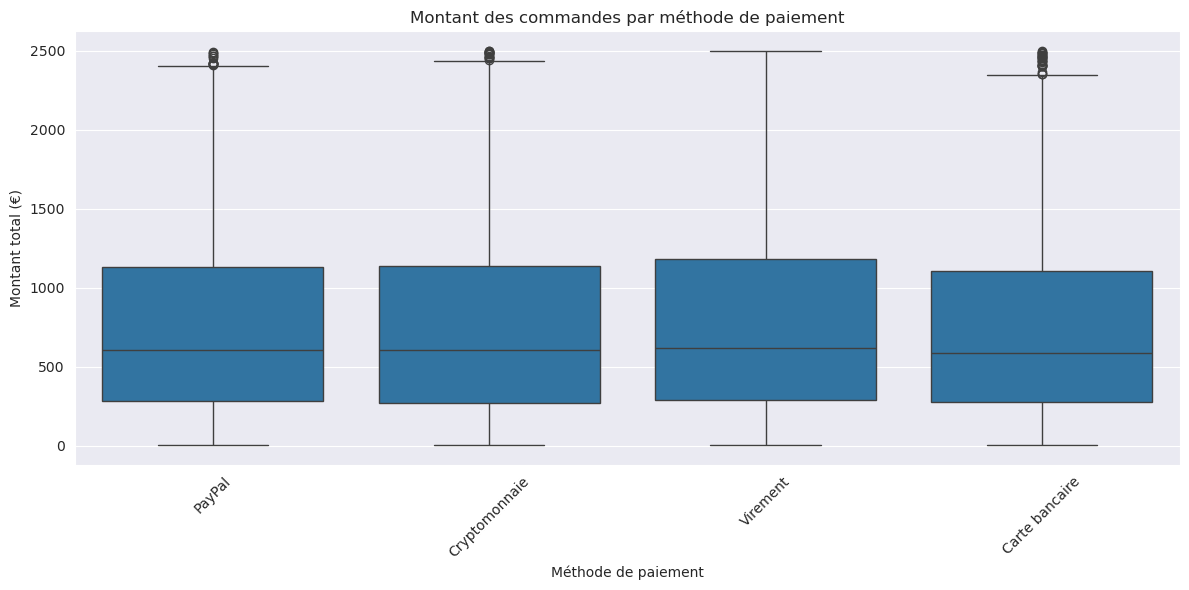

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Méthode de paiement', y='Montant total (€)', data=df)
plt.title('Montant des commandes par méthode de paiement')
plt.xlabel('Méthode de paiement')
plt.ylabel('Montant total (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

18. Générer un heatmap des notes moyennes des clients par pays et par catégorie.

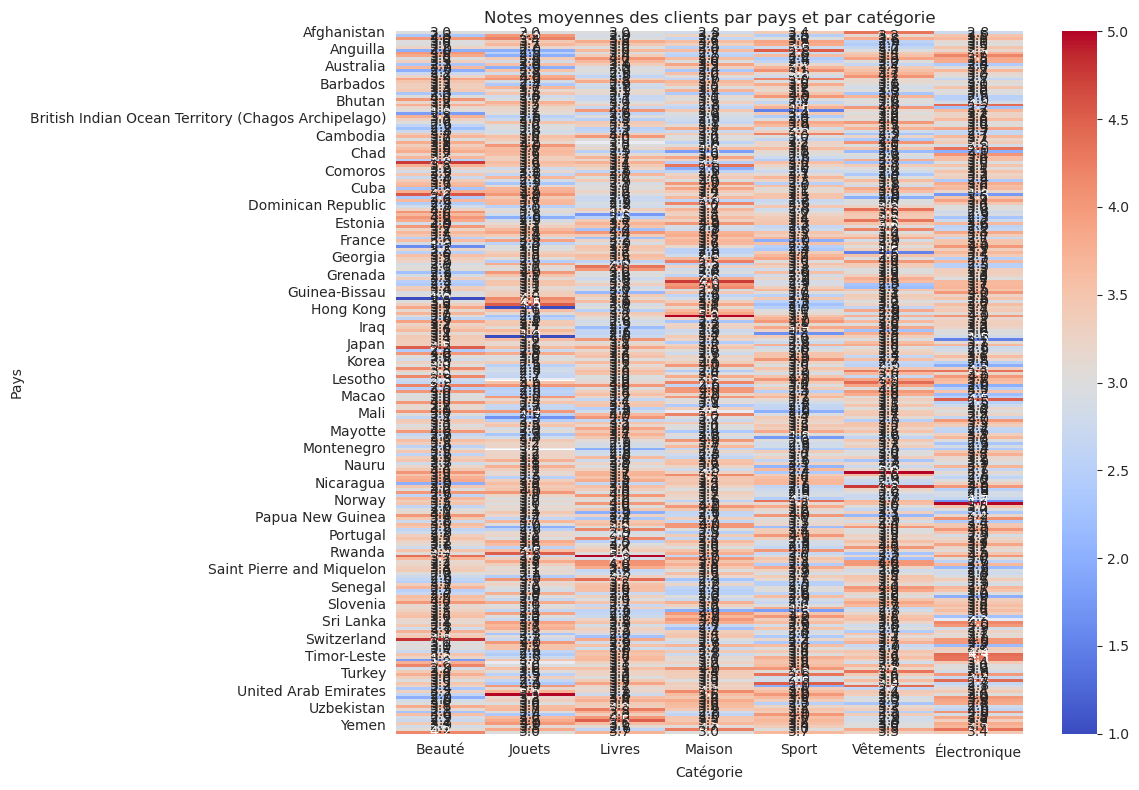

In [73]:
plt.figure(figsize=(12, 8))
heatmap_data = df.groupby(['Pays', 'Catégorie'])['Note client'].mean().unstack()
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Notes moyennes des clients par pays et par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Pays')
plt.tight_layout()
plt.show()

19. Créer un scatter plot entre la quantité et le montant total pour détecter des anomalies.

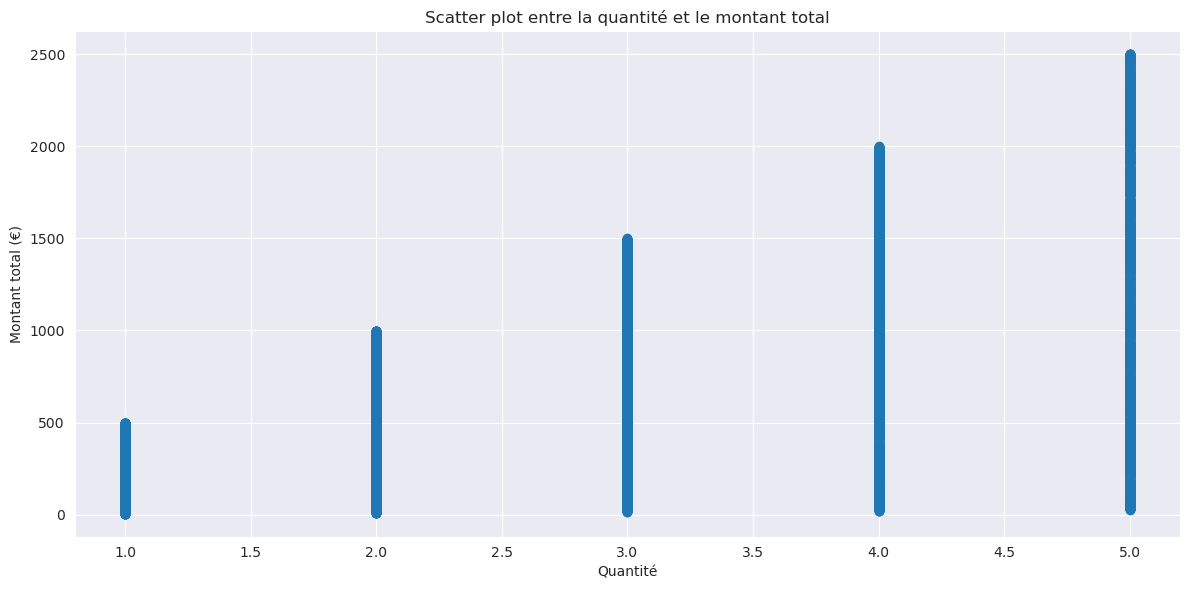

In [74]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Quantité'], df['Montant total (€)'])
plt.title('Scatter plot entre la quantité et le montant total')
plt.xlabel('Quantité')
plt.ylabel('Montant total (€)')
plt.tight_layout()
plt.show()

20. Sauvegarder le DataFrame nettoyé dans un fichier Excel nommé ‘ecommerce_transactions_clean.xlsx’.

In [77]:
df.to_excel('./data/ecommerce_transactions_clean.xlsx', index=False)